Step 1 - Import Libraries & Load Data

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Step 2 - Basic Data Overview

In [62]:
df.shape

(891, 12)

In [63]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='str')

In [64]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


In [65]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Step 3 - Missing Value Analysis

In [66]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Step 4 - Survival Analysis (EDA Core)

Survival Count

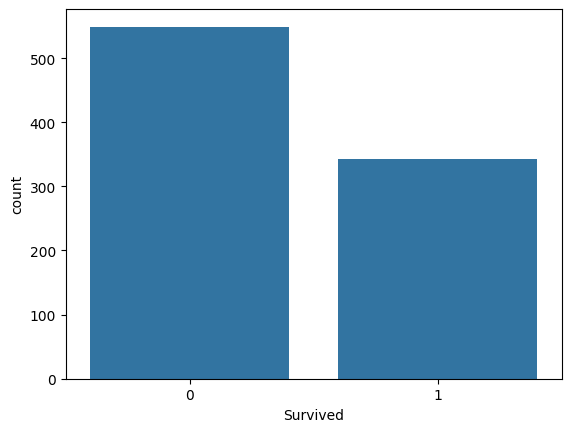

In [67]:
sns.countplot(x='Survived', data=df)
plt.show()

Survival vs Gender

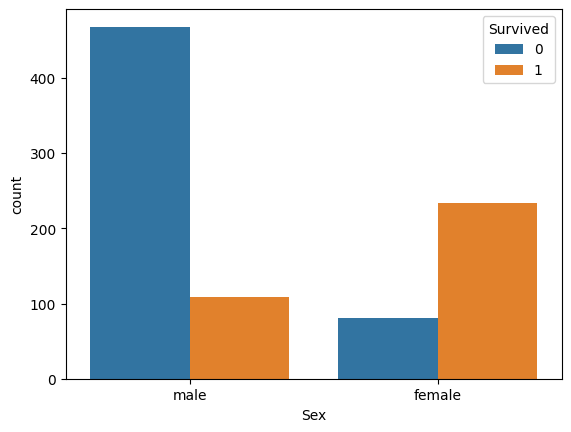

In [68]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.show()

Survival vs Passenger class

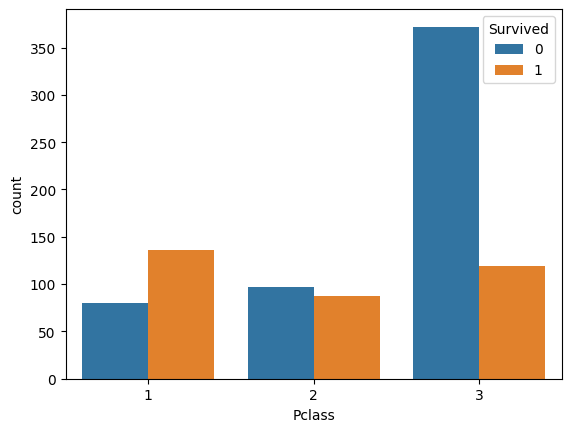

In [69]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.show()

Age distribution

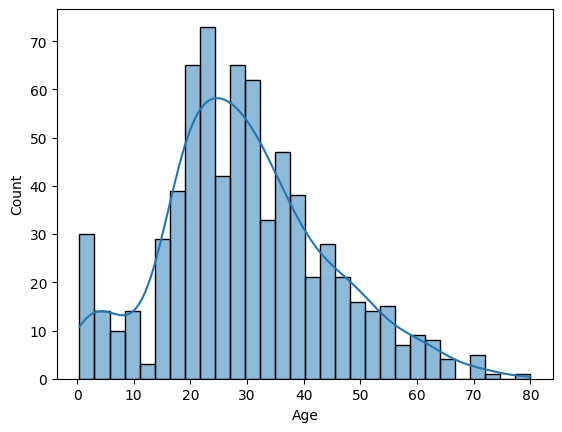

In [70]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.show()

Step 5 - Correlation Check

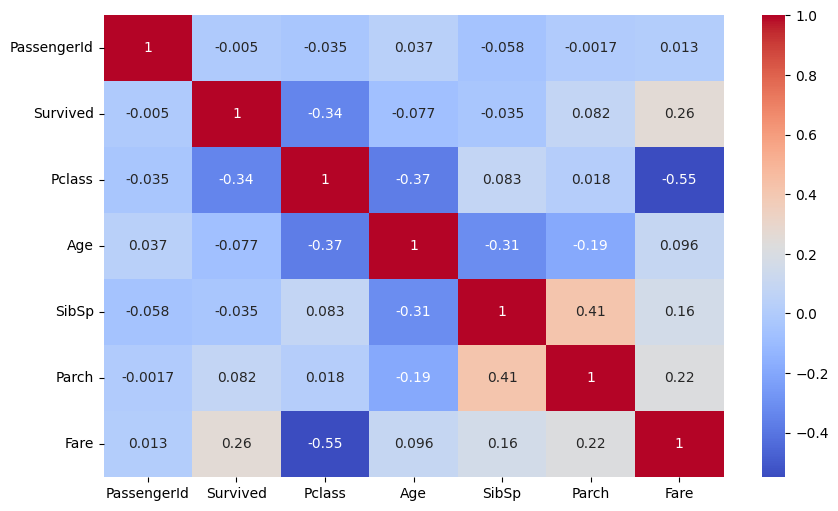

In [71]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

Step 6 - Data Cleaning

⭐ Handle Age Missing Values

In [72]:
df['Age'] = df['Age'].fillna(df['Age'].median(), inplace=False)

⭐ Handle Embarked Missing Values

In [73]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=False)

⭐ Drop Cabin Column

In [74]:
df.drop('Cabin', axis=1, inplace=True)

✅ Step 7 — Verify Cleaning

In [75]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

✅ Step 8 — Save Clean Dataset (Optional but Recommended)

In [76]:
df.to_csv('titanic_cleaned.csv', index=False)

Day-2

✅ Feature Engineering + Encoding + Scaling

✅ Step 1 — Load Clean Dataset

In [21]:
import pandas as pd

df = pd.read_csv("titanic_cleaned.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


✅ Step 2 — Feature Engineering ⭐ (Very Important)

In [22]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

🔥 Create IsAlone Feature (Optional but Powerful)

In [23]:
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

🔥 Extract Title From Name (Advanced Feature)

In [25]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'].value_counts()

<>:1: SyntaxWarning: "\." is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\."? A raw string is also an option.
<>:1: SyntaxWarning: "\." is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\."? A raw string is also an option.
C:\Users\Venkatesh\AppData\Local\Temp\ipykernel_73192\2446957854.py:1: SyntaxWarning: "\." is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\."? A raw string is also an option.
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Don           1
Mme           1
Ms            1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

In [27]:
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mile', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

✅ Step 3 — Drop Unnecessary Columns

In [28]:
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

✅ Step 4 — Encoding Categorical Variables

In [29]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

⭐ One-Hot Encode Embarked & Title

In [30]:
df = pd.get_dummies(df, columns=['Embarked', 'Title'], drop_first=True)

✅ Step 5 — Feature Scaling

⭐ Apply StandardScaler

In [31]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()

df[['Age', 'Fare', 'FamilySize']] = scaler.fit_transform(df[['Age','Fare', 'FamilySize']])

✅ Step 6 — Final Data Check

In [32]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mlle,Title_Mr,Title_Mrs,Title_Rare
0,0,3,0,-0.565736,1,0,-0.502445,0.059160,0,False,True,False,False,False,True,False,False
1,1,1,1,0.663861,1,0,0.786845,0.059160,0,False,False,False,False,False,False,True,False
2,1,3,1,-0.258337,0,0,-0.488854,-0.560975,1,False,True,False,True,False,False,False,False
3,1,1,1,0.433312,1,0,0.420730,0.059160,0,False,True,False,False,False,False,True,False
4,0,3,0,0.433312,0,0,-0.486337,-0.560975,1,False,True,False,False,False,True,False,False


In [33]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Sex           891 non-null    int64  
 3   Age           891 non-null    float64
 4   SibSp         891 non-null    int64  
 5   Parch         891 non-null    int64  
 6   Fare          891 non-null    float64
 7   FamilySize    891 non-null    float64
 8   IsAlone       891 non-null    int64  
 9   Embarked_Q    891 non-null    bool   
 10  Embarked_S    891 non-null    bool   
 11  Title_Master  891 non-null    bool   
 12  Title_Miss    891 non-null    bool   
 13  Title_Mlle    891 non-null    bool   
 14  Title_Mr      891 non-null    bool   
 15  Title_Mrs     891 non-null    bool   
 16  Title_Rare    891 non-null    bool   
dtypes: bool(8), float64(3), int64(6)
memory usage: 69.7 KB


In [34]:
df[['Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mr', 'Title_Mrs', 'Title_Rare']] = df[['Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mr', 'Title_Mrs', 'Title_Rare']].astype(int)

In [35]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Sex           891 non-null    int64  
 3   Age           891 non-null    float64
 4   SibSp         891 non-null    int64  
 5   Parch         891 non-null    int64  
 6   Fare          891 non-null    float64
 7   FamilySize    891 non-null    float64
 8   IsAlone       891 non-null    int64  
 9   Embarked_Q    891 non-null    int64  
 10  Embarked_S    891 non-null    int64  
 11  Title_Master  891 non-null    int64  
 12  Title_Miss    891 non-null    int64  
 13  Title_Mlle    891 non-null    int64  
 14  Title_Mr      891 non-null    int64  
 15  Title_Mrs     891 non-null    int64  
 16  Title_Rare    891 non-null    int64  
dtypes: float64(3), int64(14)
memory usage: 118.5 KB


✅ Step 7 — Save Prepared Dataset

In [37]:
df.to_csv('titanic_ready.csv', index=False)

🚢 Titanic ML Project — Day 3
✅ Model Building & Evaluation

✅ Step 1 — Load Final Prepared Dataset

In [38]:
import pandas as pd

df = pd.read_csv('titanic_ready.csv')
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mlle,Title_Mr,Title_Mrs,Title_Rare
0,0,3,0,-0.565736,1,0,-0.502445,0.059160,0,0,1,0,0,0,1,0,0
1,1,1,1,0.663861,1,0,0.786845,0.059160,0,0,0,0,0,0,0,1,0
2,1,3,1,-0.258337,0,0,-0.488854,-0.560975,1,0,1,0,1,0,0,0,0
3,1,1,1,0.433312,1,0,0.420730,0.059160,0,0,1,0,0,0,0,1,0
4,0,3,0,0.433312,0,0,-0.486337,-0.560975,1,0,1,0,0,0,1,0,0


✅ Step 2 — Define Features and Target

In [39]:
X = df.drop("Survived", axis=1)
y = df['Survived']

✅ Step 3 — Train/Test Split

In [40]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

🧠 Model 1 — Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression 

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

Predictions

In [42]:
y_pred_log = log_model.predict(X_test)

Evaluation

In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

Accuracy: 0.8156424581005587

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


Confusion Matrix:
 [[89 16]
 [17 57]]


🌲 Model 2 — Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier 

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

Predictions

In [45]:
y_pred_rf = rf_model.predict(X_test)

Evaluation

In [46]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nclassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8324022346368715

classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       105
           1       0.80      0.80      0.80        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



📊 Compare Models

In [47]:
log_acc = accuracy_score(y_test, y_pred_log)
rf_acc = accuracy_score(y_test, y_pred_rf)

print("Logistic Regression:", log_acc)
print("Random Forest:", rf_acc)

Logistic Regression: 0.8156424581005587
Random Forest: 0.8324022346368715


🔥 Feature Importance (Very Important)

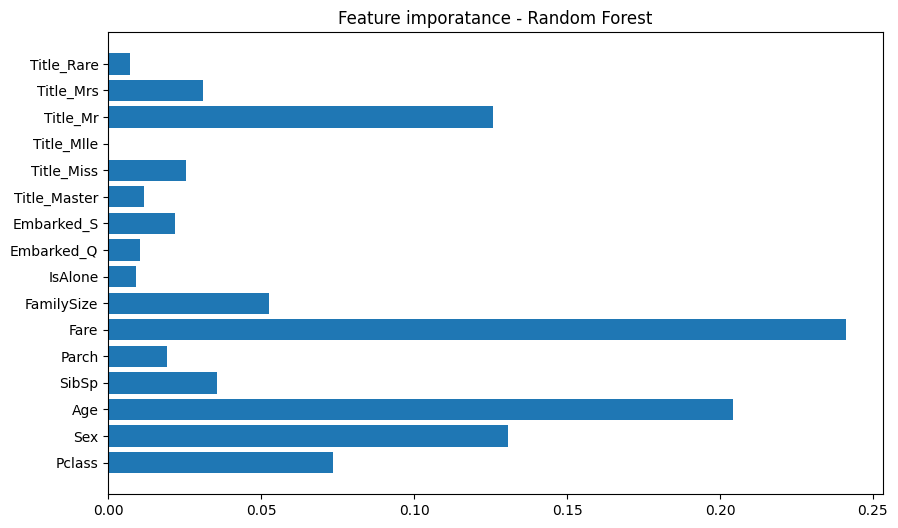

In [48]:
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_ 
features = X.columns 

plt.figure(figsize=(10,6))
plt.barh(features, importances)
plt.title("Feature imporatance - Random Forest")
plt.show()

🚀 Day 4 Agenda

✅ Step 1 — Cross Validation (More Reliable Evaluation)

In [49]:
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter = 1000)

cv_scores = cross_val_score(log_model, X, y, cv=5)

print("Cross Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())

Cross Validation Scores: [0.82122905 0.80898876 0.80898876 0.80898876 0.85955056]
Average CV Score: 0.8215491808423827


✅ Step 2 — Hyperparameter Tuning (GridSearchCV)

🌲 Random Forest Tuning

In [52]:
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier 

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    "min_samples_split": [2,5]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    rf,
    param_grid,
    cv=5, 
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)

print("Best Parammeters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Parammeters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Score: 0.8342164877376144


In [53]:
best_rf = grid_search.best_estimator_ 
y_pred_best = best_rf.predict(X_test)

✅ Step 3 — ROC Curve & AUC (Advanced Evaluation)

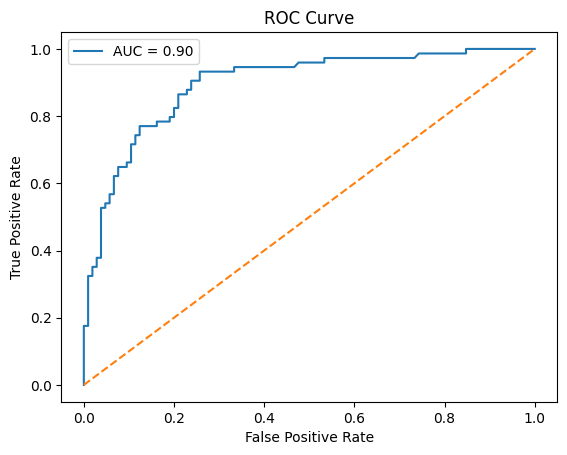

In [54]:
from sklearn.metrics import roc_curve, auc 

y_prob = best_rf.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt 

plt.figure()
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()